In [110]:
from pycaret.regression import *
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

import shutil
import os
import glob
import logger
import random
import kaleido

In [111]:
#logging.basicConfig(level=logging.ERROR)

In [113]:
sheetname='19-MSA Property Wind or Hail'

data = pd.read_excel('claim_count_fc_workbook.xlsx', sheet_name=sheetname)
data['random_col_should_not_appear_as_low_feature']= np.random.randint(0,1000,size=(len(data),1))

In [114]:
display(data)

,Date,Year,Month,Season,Quarter,CAT_Season,GDP,UNEMP,CPI,USCRUDE,GACRUDE,COVIDC,COVIDD,PIF,Claim_Volume,random_col_should_not_appear_as_low_feature
0,2017-01-31,2017,1,Winter,1,No,19.120000,4.700000,102.786000,53.590000,52.510000,0.000000e+00,0.000000,1999826.000,1984.0,265
1,2017-02-28,2017,2,Winter,1,No,19.170000,4.600000,102.892000,54.350000,53.400000,0.000000e+00,0.000000,2001729.000,877.0,125
2,2017-03-31,2017,3,Spring,1,No,19.280000,4.400000,102.847000,50.900000,49.580000,0.000000e+00,0.000000,2005354.000,7072.0,996
3,2017-04-30,2017,4,Spring,2,No,19.190000,4.500000,103.062000,52.160000,51.060000,0.000000e+00,0.000000,2006482.000,2635.0,527
4,2017-05-31,2017,5,Spring,2,No,19.380000,4.400000,102.975000,49.890000,48.500000,0.000000e+00,0.000000,2005758.000,3319.0,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2022-08-31,2022,8,Summer,3,Yes,24.893300,3.655192,121.994462,108.135836,110.316588,3.743988e+06,36806.933699,1771476.169,NaN,15
68,2022-09-30,2022,9,Fall,3,Yes,25.567091,3.645221,122.566799,105.476452,105.155961,4.671602e+06,39621.623258,1769922.024,NaN,530
69,2022-10-31,2022,10,Fall,4,Yes,25.902994,3.637669,123.077309,107.173655,107.917516,4.618322e+06,34677.139090,1765564.526,NaN,464
70,2022-11-30,2022,11,Fall,4,Yes,26.090542,3.631561,123.161016,111.177039,121.157457,3.980633e+06,43073.370417,1763298.707,NaN,630


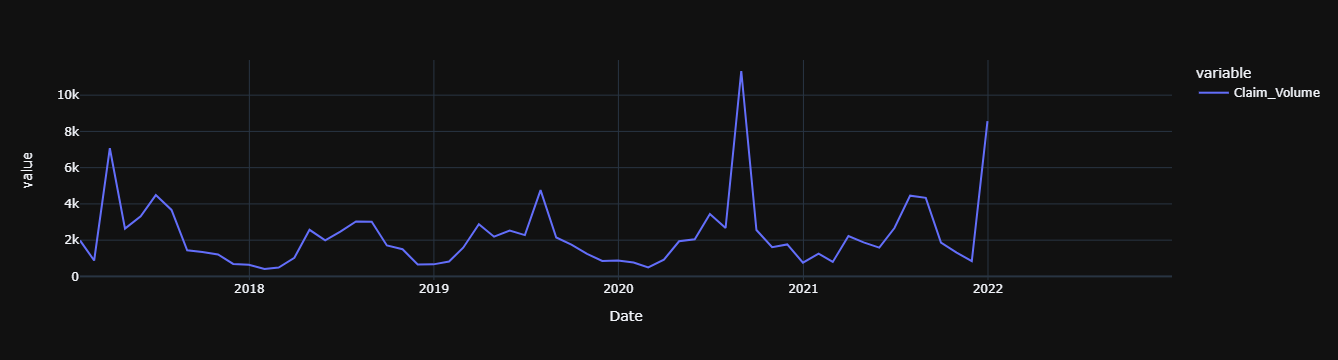

In [115]:
fig = px.line(data, x="Date", y=["Claim_Volume"], template = 'plotly_dark')
fig.show()

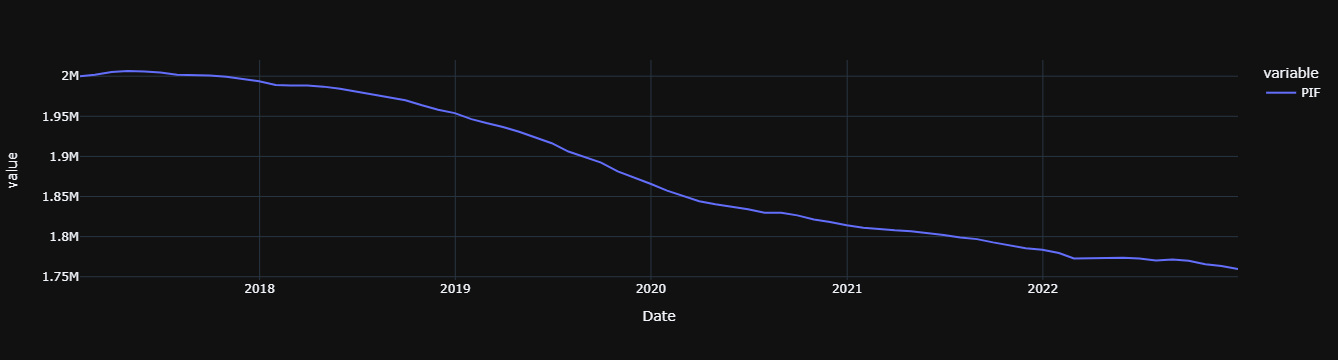

In [116]:
fig = px.line(data, x="Date", y=["PIF"], template = 'plotly_dark')
fig.show()

In [117]:
data['Series'] = np.arange(1,len(data)+1)
data = data[['Series','Date', 'Year', 'Month', 'Season','Quarter', 'CAT_Season', 'GDP','UNEMP','CPI','USCRUDE','COVIDC','COVIDD','PIF','random_col_should_not_appear_as_low_feature', 'Claim_Volume']]
data.drop(['Date', 'Series'], axis=1, inplace=True)

In [121]:
train = data[data['Year'] < 2021]
test = data[data['Year'] == 2021]
data2 = data[data['Year'] < 2022]
# check shape
train.shape, test.shape

((48, 14), (12, 14))

In [124]:
s = setup(
    data = train, 
    test_data = test, 
    target = 'Claim_Volume', 
    fold_strategy = 'timeseries', 
    numeric_features =['GDP','UNEMP','CPI','USCRUDE','COVIDC','COVIDD','PIF', 'COVIDC','COVIDD'], 
    categorical_features = ['Month', 'Year'],
    feature_selection=True,
    fold = 3,
    remove_outliers=False,
    trigonometry_features=False,
    polynomial_features=False,
    transform_target = True,
    normalize=True,
    ordinal_features={'Year':['2017','2018','2019','2020']},
    session_id = 123)

,Description,Value
0,session_id,123
1,Target,Claim_Volume
2,Original Data,"(48, 14)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,5
6,Ordinal Features,True
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(48, 30)"


[17/Mar/2022 18:10:09] INFO - create_model_container: 0
[17/Mar/2022 18:10:09] INFO - master_model_container: 0
[17/Mar/2022 18:10:09] INFO - display_container: 1
[17/Mar/2022 18:10:09] INFO - Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['Month', 'Year'],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=['GDP', 'UNEMP', 'CPI',
                                                          'USCRUDE', 'COVIDC',
                                                          'COVIDD', 'PIF',
                                                          'COVIDC', 'COVIDD'],
                                      target='Claim_Volume',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strat...
          

In [125]:
top_x_model=5
best_baseline_models = compare_models(sort = 'MAPE',n_select=top_x_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1018.2783,3533410.2504,1718.9187,-0.2668,0.6780,0.4658,0.3967
rf,Random Forest Regressor,1081.5610,3502745.2517,1749.9845,-0.4034,0.7246,0.4978,0.1633
et,Extra Trees Regressor,1016.2600,2851874.8482,1522.9864,-0.0404,0.6677,0.5042,0.1267
xgboost,Extreme Gradient Boosting,1174.2168,3602087.7917,1817.2282,-0.6466,0.8290,0.5300,10.8033
omp,Orthogonal Matching Pursuit,1189.0258,3720655.8449,1837.5694,-0.8223,1.1525,0.5375,0.6533
ada,AdaBoost Regressor,1143.9027,3609572.3173,1799.8855,-0.5533,0.7972,0.5534,0.0367
br,Bayesian Ridge,1156.9774,3406047.5546,1718.8752,-0.4024,0.7980,0.5630,0.6500
gbr,Gradient Boosting Regressor,1206.0434,4030628.1603,1885.8220,-0.6526,0.8563,0.5701,0.0233
ridge,Ridge Regression,1172.6430,3456100.0590,1668.4365,-0.2098,0.7282,0.5747,0.6567
knn,K Neighbors Regressor,1021.9517,3348290.3794,1630.5159,-0.0580,0.6553,0.5869,0.0433


[17/Mar/2022 18:11:18] INFO - create_model_container: 19
[17/Mar/2022 18:11:18] INFO - master_model_container: 19
[17/Mar/2022 18:11:18] INFO - display_container: 2
[17/Mar/2022 18:11:18] INFO - [PowerTransformedTargetRegressor(border_count=254, loss_function='RMSE',
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=123,
                                regressor=<catboost.core.CatBoostRegressor object at 0x7f1ee3f89190>,
                                task_type='CPU', verbose=False), PowerTransformedTargetRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                                max_depth=None, max_features='auto',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                       

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [10]:
model_names=pull()
model_names

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,35.2290,2197.9988,45.8523,-1.3288,0.1752,0.1244,0.7867
br,Bayesian Ridge,35.8684,2138.5011,45.0586,-1.3306,0.1714,0.1274,0.6567
rf,Random Forest Regressor,39.4546,2705.8375,48.8683,-1.5471,0.1875,0.1400,0.7800
catboost,CatBoost Regressor,40.4270,2636.9909,48.6493,-1.6427,0.1871,0.1436,0.3067
lasso,Lasso Regression,41.9797,2985.0118,51.0278,-1.9733,0.1957,0.1470,0.7567
en,Elastic Net,41.9797,2985.0118,51.0278,-1.9733,0.1957,0.1470,0.7533
llar,Lasso Least Angle Regression,41.9797,2985.0118,51.0278,-1.9733,0.1957,0.1470,0.7533
lightgbm,Light Gradient Boosting Machine,41.9797,2985.0118,51.0278,-1.9733,0.1957,0.1470,0.0233
dummy,Dummy Regressor,41.9797,2985.0118,51.0278,-1.9733,0.1957,0.1470,0.0100
omp,Orthogonal Matching Pursuit,49.5328,10264.2225,84.4252,-9.3610,0.2473,0.2007,0.6467


In [20]:
for i in range(1,10):
    model_name=model_names.index[i]
    model_create = create_model(model_name)
    print(i,model_name)
    
    #Create New Directory for each Sheet
    dir = sheetname
    if os.path.exists(dir):
        shutil.rmtree(dir)
    try:
        os.makedirs(os.path.join('viz_selection',dir,'testing_compare'))
        os.makedirs(os.path.join('viz_selection',dir,'feature_importance'))
    except:
        print('dictory exists')
    
    plt_path=plot_model(model_create,plot = 'feature_all',save=True)
    shutil.move(plt_path,'./viz_selection/%s/feature_importance/feature_importance_%s_%s.png' %(sheetname,model_name,str(i)))
    
    predictions = predict_model(model_create, data=data2)

    # add a date column in the dataset**
    predictions['Date'] = pd.date_range(start='2017-01-01', end = '2021-12-01', freq = 'MS')

    # line plot**
    fig = px.line(predictions, x='Date', y=["Claim_Volume", "Label"], template = 'plotly_dark')

    # add a vertical rectange for test-set separation
    fig.add_vrect(x0="2021-01-01", x1="2021-12-01", fillcolor="grey", opacity=0.25, line_width=0)
#     fig.show()
    fig.write_image('./viz_selection/%s/testing_compare/testing_%s_%s.png' %(sheetname,model_name,str(i)))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,22.7100,1143.4210,33.8145,-0.1268,0.1375,0.0923
1,33.9763,1675.9425,40.9383,-2.2134,0.1648,0.1281
2,69.2528,6135.6717,78.3305,-3.5798,0.2846,0.2207
Mean,41.9797,2985.0118,51.0278,-1.9733,0.1957,0.1470
SD,19.8259,2238.4352,19.5238,1.4199,0.0639,0.0541


[15/Mar/2022 23:09:13] INFO - create_model_container: 29
[15/Mar/2022 23:09:13] INFO - master_model_container: 29
[15/Mar/2022 23:09:13] INFO - display_container: 16
[15/Mar/2022 23:09:13] INFO - PowerTransformedTargetRegressor(constant=None,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                quantile=None,
                                regressor=DummyRegressor(constant=None,
                                                         quantile=None,
                                                         strategy='mean'),
                                strategy='mean')
[15/Mar/2022 23:09:13] INFO - create_model() succesfully completed......................................
8 dummy
dictory exists
[15/Mar/2022 23:09:13] INFO - Initializing plot_model()
[15/Mar/2022 23:09:13] INFO - plot_model(fold=None, use_train_data=False, verbose=True, is_in_evaluate=False, display=None

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

In [21]:
def process(filename: str=None) -> None:
    image = mpimg.imread(filename)
    # <something gets done here>
    plt.figure()
    plt.title(filename.split('/')[-1])
    plt.imshow(image)

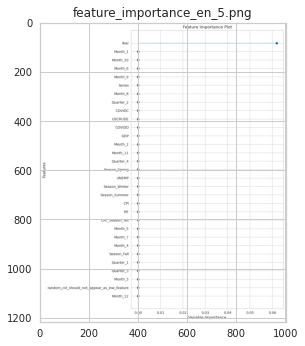

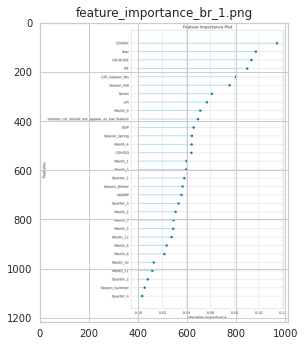

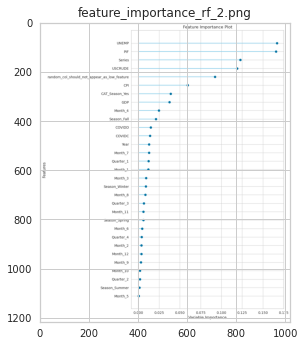

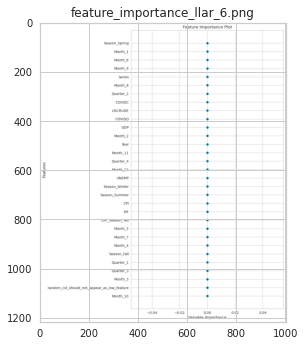

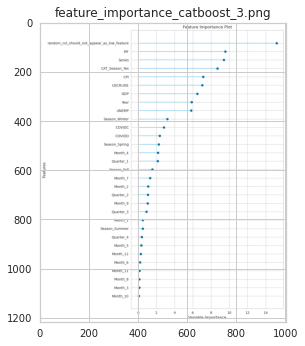

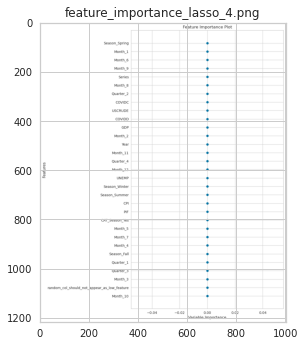

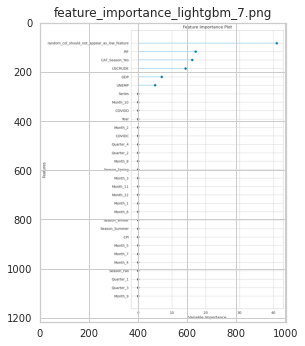

In [22]:
for file in glob.glob(os.path.join(os.getcwd(), 'viz_selection/%s/feature_importance' %(sheetname),'*.png')):
    process(file)

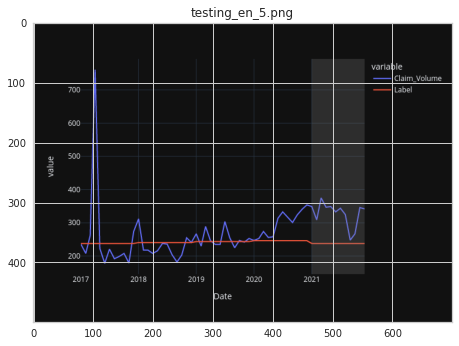

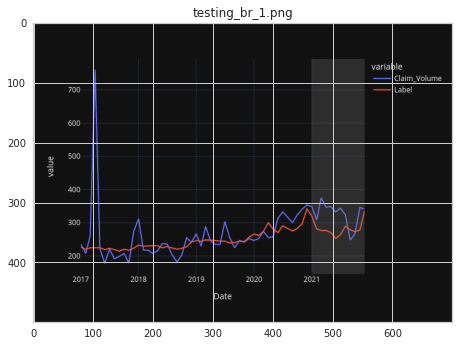

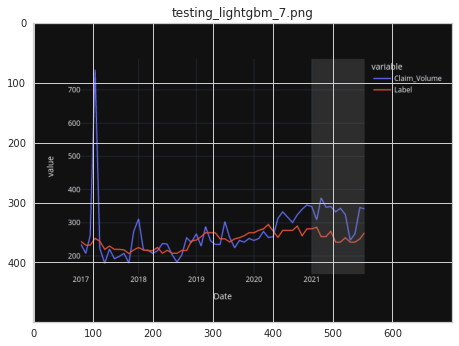

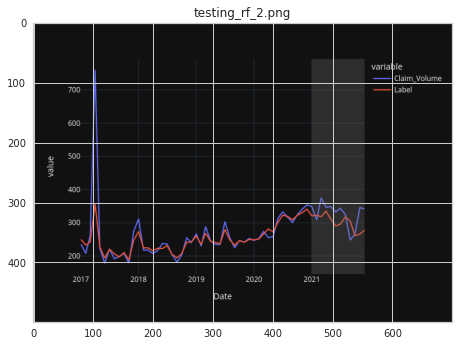

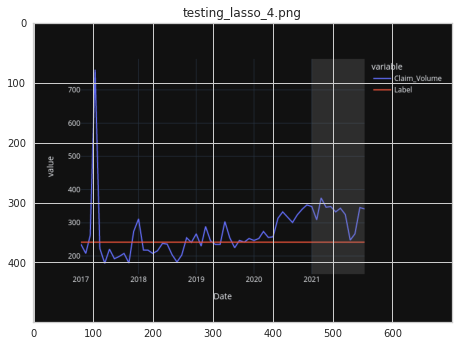

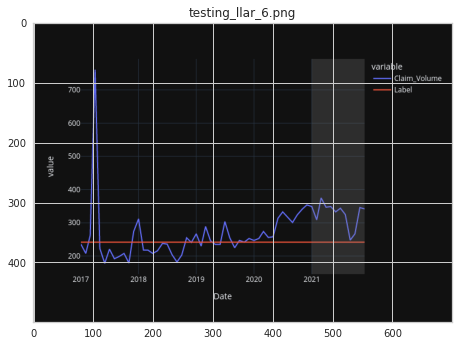

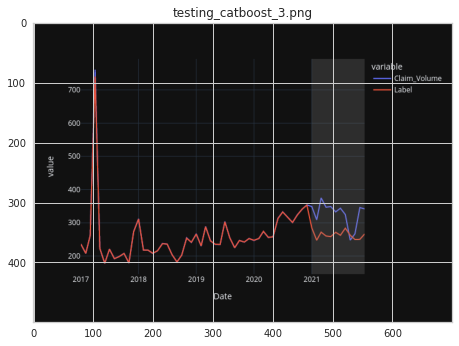

In [23]:
for file in glob.glob(os.path.join(os.getcwd(), 'viz_selection/%s/testing_compare' %(sheetname),'*.png')):
    process(file)

In [ ]:
#!tar chvfz notebook.tar.gz ../*

In [24]:
model_final_pick='rf'
picked_model = create_model(model_final_pick)
evaluate_model(picked_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,31.6263,1732.0167,41.6175,-0.7069,0.1739,0.1324
1,23.4212,997.6496,31.5856,-0.9128,0.1244,0.0871
2,63.3164,5387.8463,73.4020,-3.0216,0.2641,0.2005
Mean,39.4546,2705.8375,48.8683,-1.5471,0.1875,0.1400
SD,17.2021,1920.0177,17.8248,1.0460,0.0579,0.0466


[15/Mar/2022 23:11:01] INFO - create_model_container: 30
[15/Mar/2022 23:11:01] INFO - master_model_container: 30
[15/Mar/2022 23:11:01] INFO - display_container: 17
[15/Mar/2022 23:11:01] INFO - PowerTransformedTargetRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                                max_depth=None, max_features='auto',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_jobs=-1, oob_score=False,
                                power_transformer_method='box-cox',
                                power...
                                regressor=RandomForestRegressor(bootstrap=True,
                                                                cc

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
plt=plot_model(tuned_model, plot = 'feature_all',save=True)

[15/Mar/2022 23:11:20] INFO - Initializing predict_model()
[15/Mar/2022 23:11:20] INFO - predict_model(estimator=PowerTransformedTargetRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                                max_depth=None, max_features='auto',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_jobs=-1, oob_score=False,
                                power_transformer_method='box-cox',
                                power...
                                regressor=RandomForestRegressor(bootstrap=True,
                                                                ccp_alpha=0.0,
                                                                criter

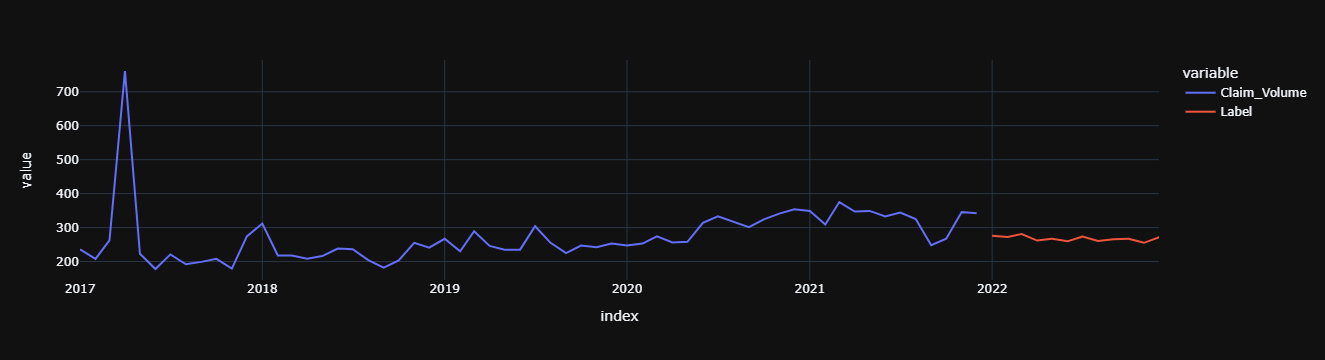

In [26]:
future_df = pd.DataFrame(data[data['Year'] == 2022])   

predictions_future = predict_model(picked_model, data=future_df)
concat_df = pd.concat([data2,predictions_future], axis=0)
concat_df_i = pd.date_range(start='2017-01-01', end = '2022-12-01', freq = 'MS')
concat_df.set_index(concat_df_i, inplace=True)

concat_df.to_csv(os.path.join(os.getcwd(), 'viz_selection/%s/tuned_%s.csv') %(sheetname,model_final_pick))
# tuned_model.to_csv(os.path.join(os.getcwd(), 'viz_selection/%s/tuned_%s.csv') %(sheetname,model_final_pick))


with open(os.path.join(os.getcwd(), 'viz_selection/%s/tuned_info_%s.txt') %(sheetname,model_final_pick), 'w') as f:
    f.writelines('\n'.join(test))

    
fig = px.line(concat_df, x=concat_df.index, y=["Claim_Volume", "Label"], template = 'plotly_dark')
fig.show()

In [104]:
train = data[data['Year'] < 2021]
test = data[data['Year'] == 2021]
data2 = data[data['Year'] < 2022]
# check shape
train.shape, test.shape
train2=train[['Year','Month','Season','Quarter','CAT_Season','CPI','UNEMP', 'USCRUDE', 'PIF','Claim_Volume']]
test2=test[['Year','Month','Season','Quarter','CAT_Season', 'CPI', 'UNEMP', 'USCRUDE','PIF', 'Claim_Volume']]

In [106]:
ada2 = setup(
    data = train2, 
    test_data = test2, 
    target = 'Claim_Volume', 
    fold_strategy = 'timeseries', 
    numeric_features = ['USCRUDE', 'CPI', 'UNEMP','PIF'],
    categorical_features = ['Month', 'Year'],
#     group_features=['']
    feature_selection=True,
    fold = 3,
    remove_outliers=False,
    trigonometry_features=False,
    polynomial_features=False,
    transform_target = True, 
    #ordinal_features={'Year':['2017','2018','2019','2020']},
    session_id = 10)

,Description,Value
0,session_id,10
1,Target,Claim_Volume
2,Original Data,"(6, 10)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(6, 9)"


[16/Mar/2022 20:27:16] INFO - create_model_container: 0
[16/Mar/2022 20:27:16] INFO - master_model_container: 0
[16/Mar/2022 20:27:16] INFO - display_container: 1
[16/Mar/2022 20:27:16] INFO - Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['Month', 'Year'],
                                      display_types=True, features_todrop=[],
                                      id_columns=['Month'],
                                      ml_usecase='regression',
                                      numerical_features=['USCRUDE', 'CPI',
                                                          'UNEMP', 'PIF'],
                                      target='Claim_Volume',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_cate...
                ('fix_perfect', Remove_100(target='Claim_Vol

In [27]:
top_x_model=5
best_baseline_models = compare_models(sort = 'MAPE',n_select=top_x_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,497.6034,1039129.4026,805.0667,0.1698,0.6650,0.5251,0.7900
catboost,CatBoost Regressor,561.4859,1126518.3215,904.2916,-0.1342,0.6956,0.5753,0.6767
gbr,Gradient Boosting Regressor,595.2427,1179825.5652,875.5493,0.0565,0.8246,0.5996,0.0200
et,Extra Trees Regressor,482.9930,1187061.6884,922.5564,-0.5806,0.6526,0.6293,0.1333
knn,K Neighbors Regressor,638.2125,1082553.6122,926.1084,-0.1347,0.7723,0.6596,0.8167
lasso,Lasso Regression,784.4926,1426435.6886,1051.4234,-0.4285,1.5022,0.7412,0.7767
xgboost,Extreme Gradient Boosting,606.0356,1581532.8704,1058.3935,-1.4031,0.8380,0.7656,10.4867
llar,Lasso Least Angle Regression,629.5833,911625.9371,866.7622,-0.0323,0.7625,0.8986,0.7700
lightgbm,Light Gradient Boosting Machine,629.5833,911625.9380,866.7622,-0.0323,0.7625,0.8986,0.0233
dummy,Dummy Regressor,629.5833,911625.9371,866.7622,-0.0323,0.7625,0.8986,0.0100


[16/Mar/2022 12:57:45] INFO - create_model_container: 14
[16/Mar/2022 12:57:45] INFO - master_model_container: 14
[16/Mar/2022 12:57:45] INFO - display_container: 3
[16/Mar/2022 12:57:45] INFO - [PowerTransformedTargetRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                                max_depth=None, max_features='auto',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_jobs=-1, oob_score=False,
                                power_transformer_method='box-cox',
                                power...
                                regressor=RandomForestRegressor(bootstrap=True,
                                                                cc

In [107]:
ada2 = create_model('gbr')
evaluate_model(ada2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,54.9973,3024.6992,54.9973,nan,0.2578,0.2282
1,140.8563,19840.5010,140.8563,nan,0.9353,1.5651
2,105.5671,11144.4140,105.5671,nan,2.3606,10.5567
Mean,100.4736,11336.5381,100.4736,nan,1.1845,4.1167
SD,35.2364,6866.3664,35.2364,nan,0.8764,4.5864


[16/Mar/2022 20:27:30] INFO - create_model_container: 1
[16/Mar/2022 20:27:30] INFO - master_model_container: 1
[16/Mar/2022 20:27:30] INFO - display_container: 2
[16/Mar/2022 20:27:30] INFO - PowerTransformedTargetRegressor(alpha=0.9, ccp_alpha=0.0,
                                criterion='friedman_mse', init=None,
                                learning_rate=0.1, loss='ls', max_depth=3,
                                max_features=None, max_leaf_nodes=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_iter_no_change=None,
                                power_transformer_method...
                                                                    max_leaf_nodes=None,
                                                            

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [108]:
model_final_pick='gbr'
future_df = pd.DataFrame(data[data['Year'] == 2022])   

predictions_future = predict_model(ada2, data=future_df)
concat_df = pd.concat([data2,predictions_future], axis=0)
concat_df_i = pd.date_range(start='2017-01-01', end = '2022-12-01', freq = 'MS')
concat_df.set_index(concat_df_i, inplace=True)

    
fig = px.line(concat_df, x=concat_df.index, y=["Claim_Volume", "Label"], template = 'plotly_dark')
fig.show()
concat_df.to_csv(os.path.join(os.getcwd(), 'viz_selection/%s/tuned_final_%s.csv') %(sheetname,model_final_pick))

[16/Mar/2022 20:27:31] INFO - Initializing predict_model()
[16/Mar/2022 20:27:31] INFO - predict_model(estimator=PowerTransformedTargetRegressor(alpha=0.9, ccp_alpha=0.0,
                                criterion='friedman_mse', init=None,
                                learning_rate=0.1, loss='ls', max_depth=3,
                                max_features=None, max_leaf_nodes=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_iter_no_change=None,
                                power_transformer_method...
                                                                    max_leaf_nodes=None,
                                                                    min_impurity_decrease=0.0,
                                             

ValueError: Length mismatch: Expected 30 rows, received array of length 72

In [109]:
plt=plot_model(ada2, plot = 'pfi',save=True)

[16/Mar/2022 20:27:32] INFO - Initializing plot_model()
[16/Mar/2022 20:27:32] INFO - plot_model(fold=None, use_train_data=False, verbose=True, is_in_evaluate=False, display=None, display_format=None, estimator=PowerTransformedTargetRegressor(alpha=0.9, ccp_alpha=0.0,
                                criterion='friedman_mse', init=None,
                                learning_rate=0.1, loss='ls', max_depth=3,
                                max_features=None, max_leaf_nodes=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_iter_no_change=None,
                                power_transformer_method...
                                                                    max_leaf_nodes=None,
                                          

ValueError: Plot Not Available. Please see docstring for list of available Plots.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
